In [73]:
from ecologico import Ecologico
from ultimatum import *
from agente import Agente
from estrategias import *
from genome import Genome, World
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
turnos_por_gen = 100
generaciones = 100
estrategias = {
    "Azarosa" : (estrat_proponer_rand, estrat_aceptar_rand, 20),
    "Mala_onda" : (estrat_proponer_rand, estrat_aceptar_nunca, 20),
    "Promedio" : (estrat_proponer_promedio, estrat_aceptar_promedio, 20),
    "Rata" : (estrat_proponer_rata, estrat_aceptar_siempre, 20),
    "Antirrata" : (estrat_proponer_antirrata, estrat_aceptar_antirrata, 20),
    }
n_agentes = 100
n_aristas = n_agentes * (n_agentes- 1) / 2
grafo = create_random_adjacency_list(n_agentes, n_aristas)

NameError: name 'estrat_proponer_rand' is not defined

In [75]:
ecologico = Ecologico(turnos_por_gen, generaciones, estrategias, n_agentes, grafo)

In [76]:
historial_estrategias = ecologico.competir()

data = [{key: value[2] for key, value in dic.items()} for dic in historial_estrategias]

In [77]:
df = pd.DataFrame(data)

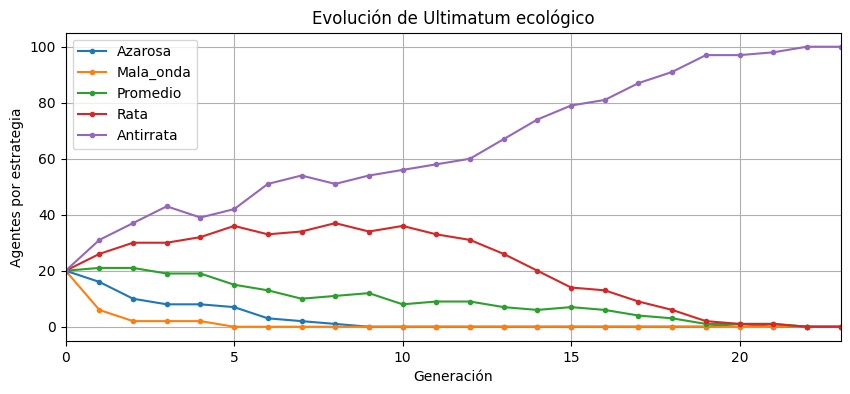

In [78]:
plt.figure(figsize=(10, 4))
end = None
for estrategia in df.columns:
    plt.plot(df.index, df[estrategia], marker='.', label=estrategia)
    if end is None:  # Solo si aún no hemos encontrado un n_agentes
        idx_n = df[estrategia][df[estrategia] == n_agentes].index
        if not idx_n.empty:
            end = idx_n[0]
            
if end == None:
    end = ecologico.n_generaciones

plt.xlim([0,end+1])
plt.xlabel('Generación')
plt.ylabel('Agentes por estrategia')
plt.title('Evolución de Ultimatum ecológico')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def contar_ganador_n_veces(n):
    resultados_win = {estrat:0 for estrat in estrategias.keys()}
    hist_grande = []
    for _ in range(n):
        historial_estrategias = ecologico.competir()
        data = [{key: value[2] for key, value in dic.items()} for dic in historial_estrategias]
        hist_grande.append(data)
        for estrat, value in historial_estrategias[-1].items():
            resultados_win[estrat] += value[2] / n_agentes # value[2] es cantidad de agentes
        
    return resultados_win, hist_grande

simulaciones = 50
result_wins, hist_grande = contar_ganador_n_veces(simulaciones)

NameError: name 'estrategias' is not defined

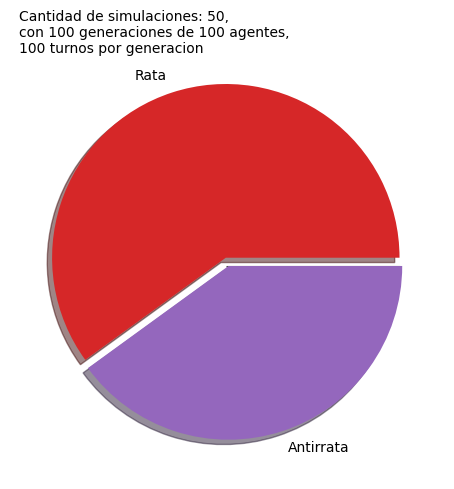

In [91]:
plt.figure(figsize=(5,5))
plt.pie(x=result_wins.values(), explode=[0.025]*len(estrategias),
        labels=[label if value > 0 else '' for label,value in result_wins.items()],
        shadow=True)
plt.text(-1.2, 1.2, f"Cantidad de simulaciones: {simulaciones},\ncon {generaciones} generaciones de {n_agentes} agentes,\n{turnos_por_gen} turnos por generacion")
plt.tight_layout()